In [134]:
import pandas as pd
import matplotlib.pyplot as plt


In [113]:
path_ages = "data/plots/tehpra_ltrs_classified_ages.tsv"
path_parts = "data/plots/Stuberosum_genome_parts.gff3"

In [114]:
df_genome_parts = pd.read_csv(path_parts, sep='\t')
df_genome_parts.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print(len(df_genome_parts.index))
df_genome_parts.head(2)

35


,seqname,source,feature,start,end,score,strand,frame,attribute
0,chr01,.,heterochromatin,4500001.0,34000000.0,.,0.0,.,.
1,chr01,.,euchromatin,34000001.0,88663952.0,.,0.0,.,.


In [115]:
df_ages = pd.read_csv(path_ages, sep='\t')
print(len(df_ages.index))
df_ages.head(2)

27591


,ID,Divergence,Age,Ts:Tv
0,RLC_family0_LTR_retrotransposon248_chr00_43732...,0.0775,38750000,11.0785
1,RLC_family0_LTR_retrotransposon829_chr00_19719...,0.0611,30550000,9.7319


In [116]:
df_ages['seqname'] = df_ages['ID'].str.split('_').str[-3:-2].str[0]
df_ages['start'] = df_ages['ID'].str.split('_').str[-2:-1].str[0]
df_ages['end'] = df_ages['ID'].str.split('_').str[-1:].str[0]
df_ages['start'] = pd.to_numeric(df_ages['start'])
df_ages['end'] = pd.to_numeric(df_ages['end'])

In [117]:
df_ages.sample(3)

,ID,Divergence,Age,Ts:Tv,seqname,start,end
13522,RLX_singleton_family160_LARD_retrotransposon25...,0.1209,60450000,3.5699,chr00,9101356,9109559
10317,RLX_family54_TRIM_retrotransposon3510_chr05_98...,0.0542,27100000,2.1205,chr05,9884236,9884642
15666,RLX_singleton_family2304_LARD_retrotransposon3...,0.0692,34600000,1.7656,chr03,59854802,59858630


In [118]:
#ADJUST VALUES HERE

In [153]:
what = 'RLG'
where = 'heterochromatin'
#where = 'euchromatin'
#what = 'RLC'

In [154]:
df_genome_parts_now = df_genome_parts[df_genome_parts.feature == where]
print(len(df_genome_parts_now.index))
df_genome_parts_now.head(3)

22


,seqname,source,feature,start,end,score,strand,frame,attribute
1,chr01,.,euchromatin,34000001.0,88663952.0,.,0.0,.,.
3,chr02,.,euchromatin,14000001.0,48614681.0,.,0.0,.,.
4,chr03,.,euchromatin,0.0,4500000.0,.,0.0,.,.


In [155]:
df_ages_now = df_ages[df_ages.ID.str.contains(what)]
print(len(df_ages_now.index))
df_ages_now.head(3)

4821


,ID,Divergence,Age,Ts:Tv,seqname,start,end
2717,RLG_family0_LTR_retrotransposon161_chr00_18907...,0.1331,66550000,1.1990,chr00,1890782,1893853
2718,RLG_family0_LTR_retrotransposon171_chr00_21055...,0.1145,57250000,2.5073,chr00,2105503,2116332
2719,RLG_family0_LTR_retrotransposon290_chr00_53432...,0.0640,32000000,2.6054,chr00,5343297,5353685


In [156]:
saved = []
for k,v in df_genome_parts_now.iterrows():
    df_filter = df_ages_now[(df_ages_now.seqname == v.seqname) &
                            (df_ages_now.start <= v.end) &
                            (df_ages_now.end >= v.start) ]
    saved.append(df_filter)
df_res = pd.concat(saved)

In [157]:
print(len(df_res.index))

1779


In [158]:
print(len(df_res.ID.unique()))

1779


In [159]:
path_save = 'data/plots/%s_%s' % (what, where)
df_res.to_csv(path_save + '.csv', index=None)

In [160]:
x = (df_res.Age / 1000000).tolist()

'data/plots/RLG_euchromatin'

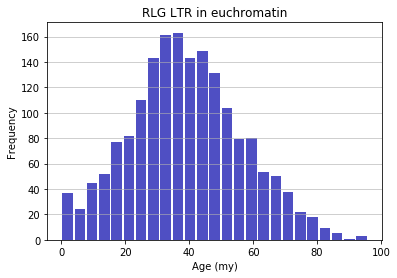

In [161]:
# An "interface" to matplotlib.axes.Axes.hist() method
fig = plt.figure()
n, bins, patches = plt.hist(x=x, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age (my)')
plt.ylabel('Frequency')
plt.title('%s LTR in %s' % (what, where))
maxfreq = n.max()
# Set a clean upper y-axis limit.
fig.savefig(path_save + '.svg', dpi=fig.dpi)
path_save